# Spaceship Titanic Challenge

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load the DataSet

In [2]:
train_data = pd.read_csv('train.csv') # Will be used for train the model
test_data = pd.read_csv('test.csv') # Will be used for test the model

In [3]:
train_data.shape, test_data.shape

((8693, 14), (4277, 13))

#### Lets view the DataSets

In [4]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## Here, i will define the PassengerId as the index of the DataFrames

In [6]:
train_data.set_index('PassengerId', inplace=True)
test_data.set_index('PassengerId', inplace=True)

## First, I will change the value of ‘Transported’, changing it to numbers

In [7]:
# Replace True to 1 and False to 0 in 'Transported' column
train_data['Transported'] = train_data['Transported'].astype(int)

## Now, let's concatenate the DataSets

In [8]:
data = pd.concat([train_data, test_data], sort=True)

## How we want predict the 'Transported' column, let's visualize the data distribution

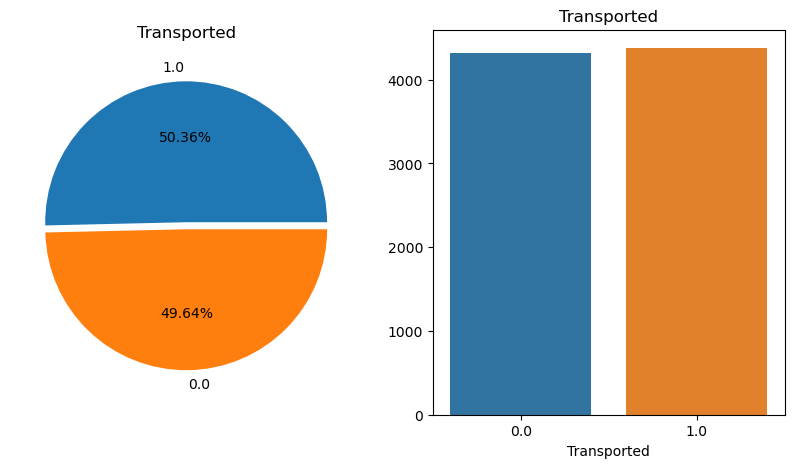

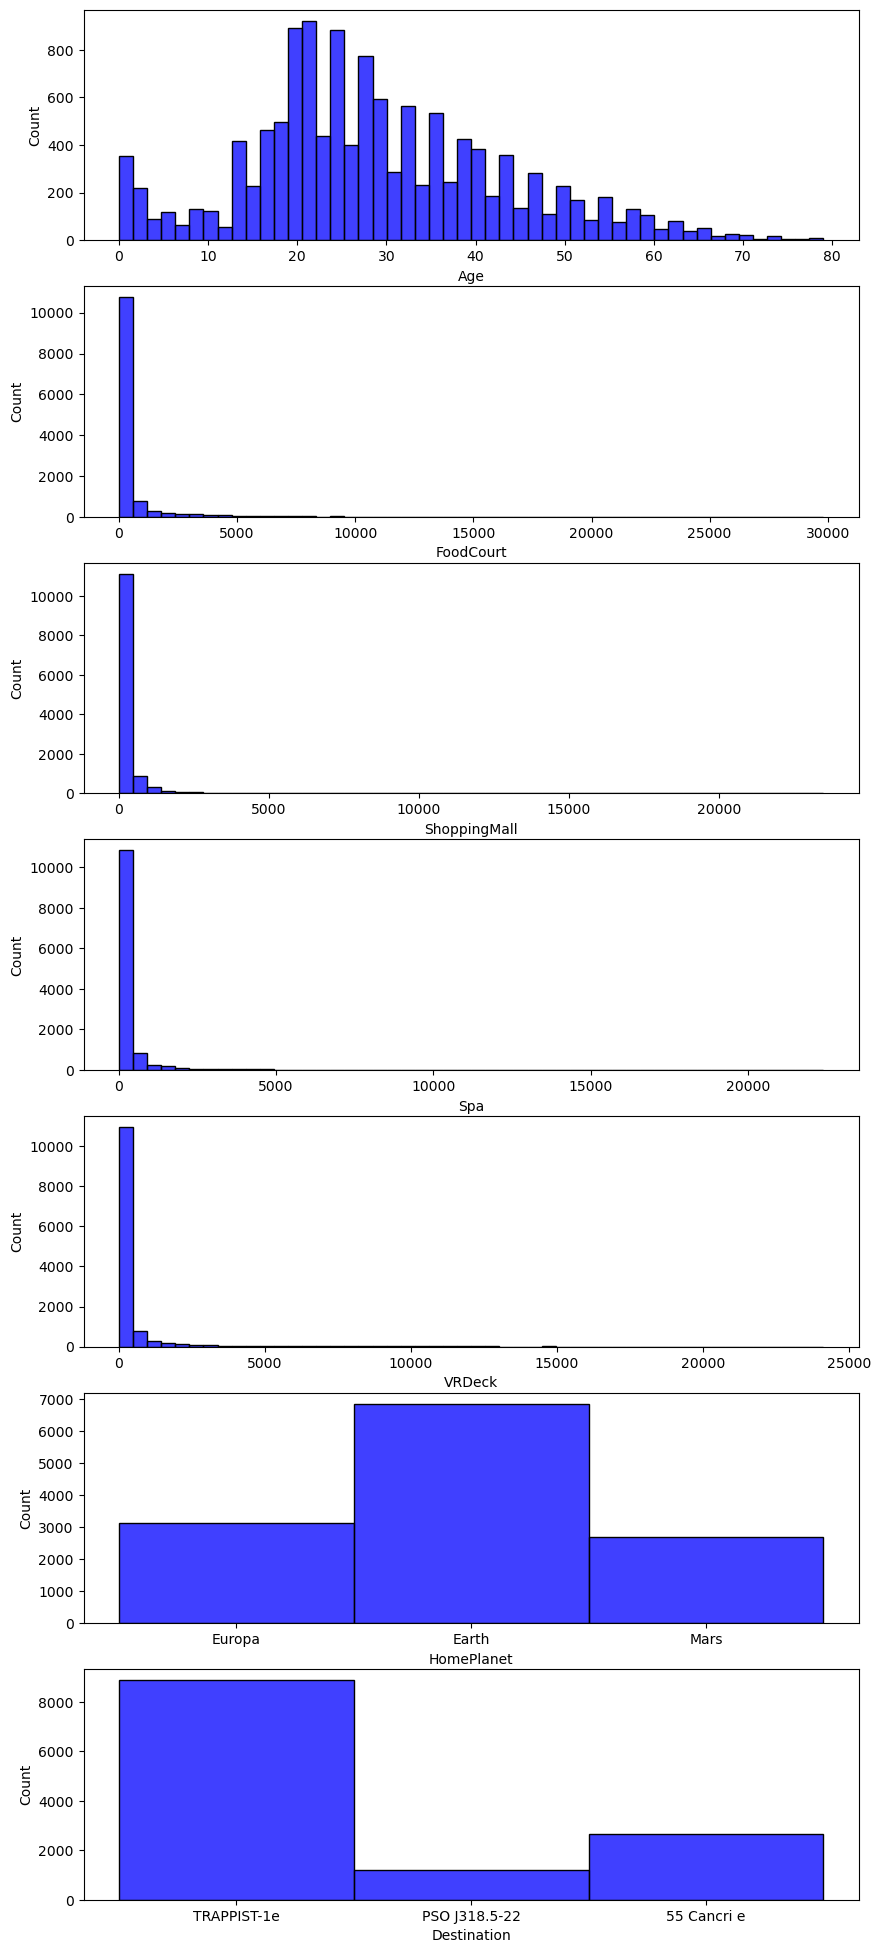

In [9]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Transported'].value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%',ax=ax[0])
ax[0].set_title('Transported')
ax[0].set_ylabel('')
sns.countplot(x='Transported',data=data,ax=ax[1]) 
ax[1].set_title('Transported')
ax[1].set_ylabel('')

fig, ax = plt.subplots(7,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(data['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(data['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(data['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(data['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(data['VRDeck'], color='b', bins=50, ax=ax[4]);
sns.histplot(data['HomePlanet'], color='b', bins=50, ax=ax[5]);
sns.histplot(data['Destination'], color='b', bins=50, ax=ax[6]);


## The Cabin column takes the form deck/num/side, where side can be either P for Port or S for Starboard, we will separate it into different columns

In [10]:
data[["Deck", "Cabin_num", "Side"]] = data["Cabin"].str.split("/", expand=True)

In [11]:
data.head()

,Age,Cabin,CryoSleep,Destination,FoodCourt,HomePlanet,Name,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Deck,Cabin_num,Side
PassengerId,,,,,,,,,,,,,,,,
0001_01,39.0,B/0/P,False,TRAPPIST-1e,0.0,Europa,Maham Ofracculy,0.0,0.0,0.0,0.0,False,0.0,B,0,P
0002_01,24.0,F/0/S,False,TRAPPIST-1e,9.0,Earth,Juanna Vines,109.0,25.0,549.0,1.0,False,44.0,F,0,S
0003_01,58.0,A/0/S,False,TRAPPIST-1e,3576.0,Europa,Altark Susent,43.0,0.0,6715.0,0.0,True,49.0,A,0,S
0003_02,33.0,A/0/S,False,TRAPPIST-1e,1283.0,Europa,Solam Susent,0.0,371.0,3329.0,0.0,False,193.0,A,0,S
0004_01,16.0,F/1/S,False,TRAPPIST-1e,70.0,Earth,Willy Santantines,303.0,151.0,565.0,1.0,False,2.0,F,1,S


# Prepare the DataFrame

## Let's verify the null dates

In [12]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [13]:
test_data.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

### I will remove the ´Cabin´ and ´Name´ columns, because the variety of categorical data is large and will hinder more than help

In [14]:
data.drop(['Cabin'], axis=1, inplace=True)
data.drop(['Name'], axis=1, inplace=True)

## finally filling the null datas

In [15]:
Age_Mean = data['Age'].mean().round(0)
data['Age'].fillna(Age_Mean, inplace=True)

Mode_CryoSleep = data['CryoSleep'].mode()[0]
data['CryoSleep'].fillna(Mode_CryoSleep, inplace=True)

Mode_Destination = data['Destination'].mode()[0]
data['Destination'].fillna(Mode_Destination, inplace=True)

Mode_FoodCourt = data['FoodCourt'].mode()[0]
data['FoodCourt'].fillna(Mode_FoodCourt, inplace=True)

Mode_HomePlanet = data['HomePlanet'].mode()[0]
data['HomePlanet'].fillna(Mode_HomePlanet, inplace=True)

Mode_RoomService = data['RoomService'].mode()[0]
data['RoomService'].fillna(Mode_RoomService, inplace=True)

Mode_ShoppingMall = data['ShoppingMall'].mode()[0]
data['ShoppingMall'].fillna(Mode_ShoppingMall, inplace=True)

Mode_Spa = data['Spa'].mode()[0]
data['Spa'].fillna(Mode_Spa, inplace=True)

Mode_VIP = data['VIP'].mode()[0]
data['VIP'].fillna(Mode_VIP, inplace=True)

Mode_VRDeck = data['VRDeck'].mode()[0]
data['VRDeck'].fillna(Mode_VRDeck, inplace=True)

Mode_Deck = data['Deck'].mode()[0]
data['Deck'].fillna(Mode_Deck, inplace=True)

Mode_Side = data['Side'].mode()[0]
data['Side'].fillna(Mode_Side, inplace=True)

Mode_Side = data['Cabin_num'].mode()[0]
data['Cabin_num'].fillna(Mode_Side, inplace=True)

In [16]:
data.isnull().sum()

Age                0
CryoSleep          0
Destination        0
FoodCourt          0
HomePlanet         0
RoomService        0
ShoppingMall       0
Spa                0
Transported     4277
VIP                0
VRDeck             0
Deck               0
Cabin_num          0
Side               0
dtype: int64

## We have to leave the numeric values, let's do this for the columns that contain false and true

In [17]:
data[['Cabin_num', 'VIP', 'CryoSleep']] = data[['Cabin_num', 'VIP', 'CryoSleep']].astype(int)

### those that remain, I will use the dummies function

In [18]:
data = pd.get_dummies(data, columns=['Destination',  
                                     'HomePlanet',
                                     'Side',
                                     'Deck'], dtype=int) #drop_first=True

In [19]:
data.head()

,Age,CryoSleep,FoodCourt,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Cabin_num,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,1,0,0,1,0,0,0,0,0,0
0002_01,24.0,0,9.0,109.0,25.0,549.0,1.0,0,44.0,0,...,0,1,0,0,0,0,0,1,0,0
0003_01,58.0,0,3576.0,43.0,0.0,6715.0,0.0,1,49.0,0,...,0,1,1,0,0,0,0,0,0,0
0003_02,33.0,0,1283.0,0.0,371.0,3329.0,0.0,0,193.0,0,...,0,1,1,0,0,0,0,0,0,0
0004_01,16.0,0,70.0,303.0,151.0,565.0,1.0,0,2.0,1,...,0,1,0,0,0,0,0,1,0,0


# The base of our Dataset is done for training

### Now, i will virify the correlations between the columns

In [20]:
# Select only the numeric columns
data_numeric = data.select_dtypes(include=['number'])

data_numeric.corr()

,Age,CryoSleep,FoodCourt,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Cabin_num,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
Age,1.000000,-0.063784,0.120870,0.066727,0.034243,0.115753,-0.074249,0.080663,0.100274,-0.133737,...,-0.015069,0.015069,0.076716,0.099802,0.122854,0.079064,0.035098,-0.018507,-0.209761,0.013852
CryoSleep,-0.063784,1.000000,-0.208257,-0.251463,-0.216048,-0.199305,0.460132,-0.076891,-0.189989,-0.039710,...,-0.016018,0.016018,-0.022803,0.116176,0.042102,-0.060095,-0.114743,-0.213698,0.242272,-0.021530
FoodCourt,0.120870,-0.208257,1.000000,-0.019647,-0.001744,0.226243,0.045583,0.122726,0.240978,-0.174558,...,-0.010356,0.010356,0.105821,0.155138,0.243770,0.033026,-0.031626,-0.128403,-0.147659,0.041159
RoomService,0.066727,-0.251463,-0.019647,1.000000,0.054987,0.008570,-0.241124,0.059601,-0.023130,-0.009946,...,0.004064,-0.004064,-0.025857,-0.062028,-0.021557,0.158786,0.045029,0.093733,-0.147167,-0.000529
ShoppingMall,0.034243,-0.216048,-0.001744,0.054987,1.000000,0.011433,0.009391,0.024069,0.003102,-0.007773,...,0.021506,-0.021506,-0.021542,-0.026580,0.003116,0.068862,0.034503,0.073662,-0.112250,-0.005462
Spa,0.115753,-0.199305,0.226243,0.008570,0.011433,1.000000,-0.218545,0.080932,0.145285,-0.129094,...,-0.009401,0.009401,0.065326,0.129532,0.165807,0.023498,-0.015800,-0.080068,-0.125934,0.043099
Transported,-0.074249,0.460132,0.045583,-0.241124,0.009391,-0.218545,1.000000,-0.037261,-0.204874,-0.044012,...,-0.101397,0.101397,-0.002623,0.144733,0.108193,-0.034046,-0.097965,-0.086360,0.016269,-0.014568
VIP,0.080663,-0.076891,0.122726,0.059601,0.024069,0.080932,-0.037261,1.000000,0.109891,-0.090077,...,0.010322,-0.010322,0.123778,0.064441,0.061266,0.060625,-0.003278,-0.053515,-0.094059,-0.004272
VRDeck,0.100274,-0.189989,0.240978,-0.023130,0.003102,0.145285,-0.204874,0.109891,1.000000,-0.133237,...,-0.001701,0.001701,0.097644,0.123534,0.196148,-0.002994,-0.009021,-0.097508,-0.123675,0.018304
Cabin_num,-0.133737,-0.039710,-0.174558,-0.009946,-0.007773,-0.129094,-0.044012,-0.090077,-0.133237,1.000000,...,0.056594,-0.056594,-0.176534,-0.259476,-0.253661,-0.212535,-0.191507,0.393772,0.204172,-0.033488


### We can visualize in grafics

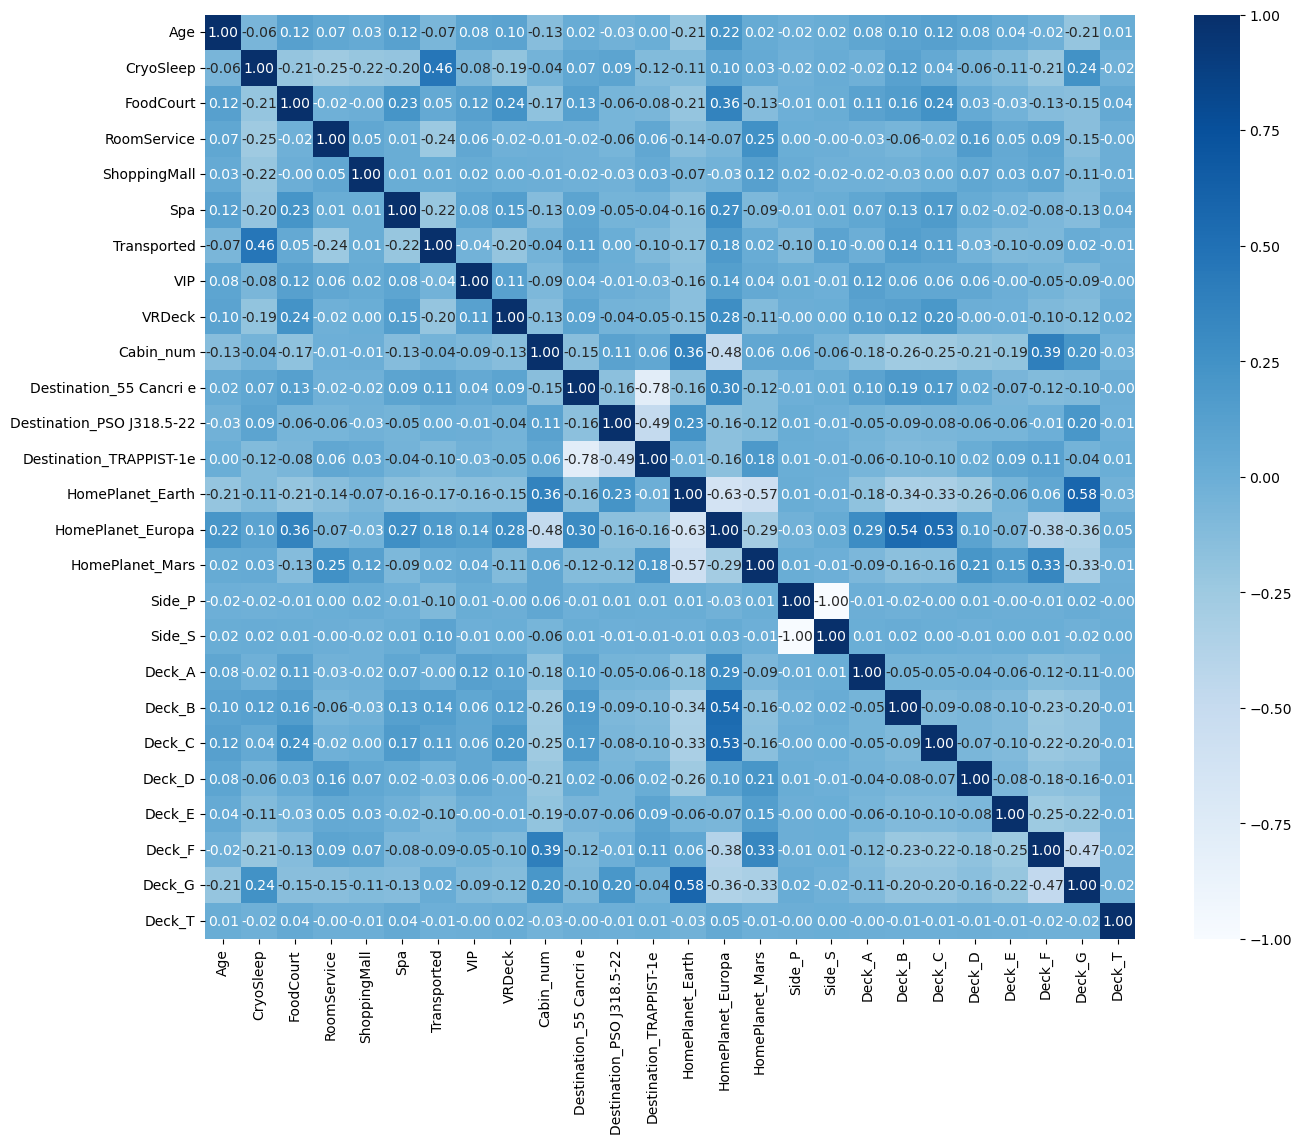

In [21]:
#sns.heatmap(data_numeric.corr(), annot=True, cmap='Blues')

plt.figure(figsize=(15, 12))  # Defina o tamanho do mapa de calor
sns.heatmap(data_numeric.corr(), annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 10})  # Defina o tamanho da fonte

plt.show()

### And to calculate the correlations between categorical columns, we can do

In [22]:
from scipy.stats import chi2_contingency

# Definir uma função para calcular a correlação de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calcular as correlações entre todas as colunas e 'Transported'
correlacoes_transported = {}
for column in data.columns:
    correlation = cramers_v(data[column], data['Transported'])
    correlacoes_transported[column] = correlation

# Exibir as correlações
correlacoes_transported

{'Age': 0.14388087591233448,
 'CryoSleep': 0.45979242141732846,
 'FoodCourt': 0.2595092667059137,
 'RoomService': 0.2765619863139802,
 'ShoppingMall': 0.274524251473747,
 'Spa': 0.2712939761933015,
 'Transported': 0.9997698912675346,
 'VIP': 0.03488168932550548,
 'VRDeck': 0.245600910433057,
 'Cabin_num': 0.14354215211978377,
 'Destination_55 Cancri e': 0.10791286028085215,
 'Destination_PSO J318.5-22': 0.0,
 'Destination_TRAPPIST-1e': 0.0954722192625545,
 'HomePlanet_Earth': 0.16828218395986685,
 'HomePlanet_Europa': 0.17633326469504634,
 'HomePlanet_Mars': 0.01599438196989587,
 'Side_P': 0.10060274455753596,
 'Side_S': 0.10060274455753596,
 'Deck_A': 0.0,
 'Deck_B': 0.14393943875728205,
 'Deck_C': 0.10725380831183068,
 'Deck_D': 0.031781970754924484,
 'Deck_E': 0.09699696828995276,
 'Deck_F': 0.08545222371341121,
 'Deck_G': 0.011895140472456083,
 'Deck_T': 0.0}

### With this, we can observe the columns that most correlate with our objective

# Update train_data and test_data

### First with train_data

In [23]:
train_data.shape

(8693, 13)

In [24]:
train = data.loc[train_data.index]

In [25]:
train.shape

(8693, 26)

In [26]:
train.isnull().sum()

Age                          0
CryoSleep                    0
FoodCourt                    0
RoomService                  0
ShoppingMall                 0
Spa                          0
Transported                  0
VIP                          0
VRDeck                       0
Cabin_num                    0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Side_P                       0
Side_S                       0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
dtype: int64

### Now with test_data

In [27]:
test_data.shape

(4277, 12)

In [28]:
test = data.loc[test_data.index]

In [29]:
test.shape

(4277, 26)

In [30]:
test.isnull().sum()

Age                             0
CryoSleep                       0
FoodCourt                       0
RoomService                     0
ShoppingMall                    0
Spa                             0
Transported                  4277
VIP                             0
VRDeck                          0
Cabin_num                       0
Destination_55 Cancri e         0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
HomePlanet_Earth                0
HomePlanet_Europa               0
HomePlanet_Mars                 0
Side_P                          0
Side_S                          0
Deck_A                          0
Deck_B                          0
Deck_C                          0
Deck_D                          0
Deck_E                          0
Deck_F                          0
Deck_G                          0
Deck_T                          0
dtype: int64

## Set X and Y for training

In [31]:
X = train.drop('Transported', axis=1)

In [32]:
y = train['Transported']

## Select columns for training

### at first moment, let´s training with all columns for evaluate the result

In [33]:
X.columns

Index(['Age', 'CryoSleep', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa',
       'VIP', 'VRDeck', 'Cabin_num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Side_P',
       'Side_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_T'],
      dtype='object')

In [34]:
# at first moment, let´s training with all columns for see the result
columns = ['Age', 'CryoSleep', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa',
       'VIP', 'VRDeck', 'Cabin_num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Side_P',
       'Side_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_T']

In [35]:
X = X[columns]

In [36]:
# dividing the dataset into training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [37]:
X_train.shape, y_train.shape

((6519, 25), (6519,))

In [38]:
X_test.shape, y_test.shape

((2174, 25), (2174,))

## Applying the train

### I will train several multiple models at the same time for evaluate them

In [39]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=1, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [41]:
modelos = [{'nome': 'XGBoost',
            'modelo': XGBClassifier},
           {'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

#### Here, let´s train multiple models at the same time

In [42]:
resultados = []

for model_info in modelos:
    x = ModeloAuxiliar(clf=model_info['modelo'])
    
    # Treinar o modelo
    x.fit(X_train, y_train)
    
    # Verificar os dados de teste e convertê-los se necessário
    if not isinstance(X_test, np.ndarray):
        X_test = np.array(X_test)
    
    # Verificar a consistência dos dados
    if X_test.shape[1] != X_train.shape[1]:
        print("Erro: O número de features nos dados de teste não é o mesmo que nos dados de treinamento.")
        continue
    
    # Fazer previsões
    x_pred = x.predict(X_test)
    
    # Calcular a acurácia
    acuracidade = x.score(X_test, y_test)
    
    resultados.append({
        'nome': model_info.get('nome', str(model_info['modelo'])),
        'score': acuracidade,
        'pred': x_pred
    })

In [43]:
# Transforming the results in a DataFrame
models = pd.DataFrame(resultados)

#### Here we can visualize the accuracy of each model

In [46]:
models[['nome', 'score']].sort_values(by='score', ascending=False)

,nome,score
0,XGBoost,0.817847
3,gradboost,0.816007
2,etree,0.811408
12,RForest,0.811408
4,adaboost,0.810028
1,logreg,0.804508
5,SVC,0.790708
6,KNN,0.780129
10,SGD,0.768169
8,Perceptron,0.767709


## We have to choice a model to tune the results and continue with the project, by personal choice, i will choice the RandomForest model, with accuracy 81,2%, to continue

#### I will use Optuna for find the bests params, in the model trained above the params are random

In [47]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def objective(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    # Create an instance of the RandomForestClassifier model with the suggested hyperparameters
    model2 = RandomForestClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=123)
    
    # Train the model
    model2.fit(X_train, y_train)
    
    # Predict of data
    y_pred2 = model2.predict(X_test)
    
    # calculate the accuracy in dataset test
    accuracy2 = accuracy_score(y_test, y_pred2)
    
    return accuracy2

# Create an Optuna study object
study = optuna.create_study(direction='maximize')

# Run optimization
study.optimize(objective, n_trials=100)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", study.best_params)

# Imprimir a acurácia do melhor modelo nos dados de teste
print("Acurácia do melhor modelo nos dados de teste:", study.best_value)

[I 2024-02-28 10:22:51,848] A new study created in memory with name: no-name-5f87d41a-355e-4da1-a0fb-2a4d27954984
[I 2024-02-28 10:22:53,391] Trial 0 finished with value: 0.8178472861085556 and parameters: {'n_estimators': 116, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8178472861085556.
[I 2024-02-28 10:22:54,776] Trial 1 finished with value: 0.7580496780128795 and parameters: {'n_estimators': 269, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8178472861085556.
[I 2024-02-28 10:22:57,064] Trial 2 finished with value: 0.8183072677092916 and parameters: {'n_estimators': 221, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.8183072677092916.
[I 2024-02-28 10:22:58,166] Trial 3 finished with value: 0.8068077276908924 and parameters: {'n_estimators': 137, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 2 with value

[I 2024-02-28 10:24:31,960] Trial 36 finished with value: 0.8183072677092916 and parameters: {'n_estimators': 231, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 15 with value: 0.8247470101195952.
[I 2024-02-28 10:24:35,313] Trial 37 finished with value: 0.8178472861085556 and parameters: {'n_estimators': 187, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 15 with value: 0.8247470101195952.
[I 2024-02-28 10:24:37,091] Trial 38 finished with value: 0.7732290708371665 and parameters: {'n_estimators': 265, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 15 with value: 0.8247470101195952.
[I 2024-02-28 10:24:38,586] Trial 39 finished with value: 0.8164673413063478 and parameters: {'n_estimators': 136, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 15 with value: 0.8247470101195952.
[I 2024-02-28 10:24:41,371] Trial 40 finished with value: 0.8187672493100276 and par

[I 2024-02-28 10:26:46,226] Trial 72 finished with value: 0.8201471941122355 and parameters: {'n_estimators': 290, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 45 with value: 0.827506899724011.
[I 2024-02-28 10:26:50,396] Trial 73 finished with value: 0.8192272309107635 and parameters: {'n_estimators': 280, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 45 with value: 0.827506899724011.
[I 2024-02-28 10:26:55,139] Trial 74 finished with value: 0.8247470101195952 and parameters: {'n_estimators': 294, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 45 with value: 0.827506899724011.
[I 2024-02-28 10:26:59,924] Trial 75 finished with value: 0.8238270469181233 and parameters: {'n_estimators': 299, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 45 with value: 0.827506899724011.
[I 2024-02-28 10:27:04,505] Trial 76 finished with value: 0.8242870285188593 and param

Melhores hiperparâmetros: {'n_estimators': 226, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2}
Acurácia do melhor modelo nos dados de teste: 0.827506899724011


### With this, we have the bests params for our model

#### Now, let´s train with this params

In [48]:
from sklearn.model_selection import cross_val_score

rforest = RandomForestClassifier(n_estimators=226, random_state=123, min_samples_split=4, min_samples_leaf=2,
                                 max_depth=15)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
print('Score', rforest.score(X_test, y_test))
cross = cross_val_score(rforest, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.827506899724011
Score cross-validado 0.8013042742992432


#### We can see that the score increased. We can still improve our model even further, let´s visualize the feature importance

In [50]:
rf_params = {
    'n_estimators': 226,
    'max_depth': 15,
    'min_samples_leaf': 2,
    'min_samples_split': 4,
    'random_state': 123
}

In [52]:
rf = ModeloAuxiliar(clf=RandomForestClassifier, params=rf_params)
rf_features = rf.feature_importances(X_train,y_train)

In [53]:
cols = X_train.columns.values
cols

array(['Age', 'CryoSleep', 'FoodCourt', 'RoomService', 'ShoppingMall',
       'Spa', 'VIP', 'VRDeck', 'Cabin_num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Side_P', 'Side_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'], dtype=object)

In [55]:
feature_dataframe = pd.DataFrame({'Features': cols, 
                                  'Feature importance RandomForest': rf_features})
feature_dataframe

,Features,Feature importance RandomForest
0,Age,0.091313
1,CryoSleep,0.120969
2,FoodCourt,0.086637
3,RoomService,0.111259
4,ShoppingMall,0.075219
5,Spa,0.122930
6,VIP,0.001441
7,VRDeck,0.110779
8,Cabin_num,0.114303
9,Destination_55 Cancri e,0.008285


<Axes: ylabel='Features'>

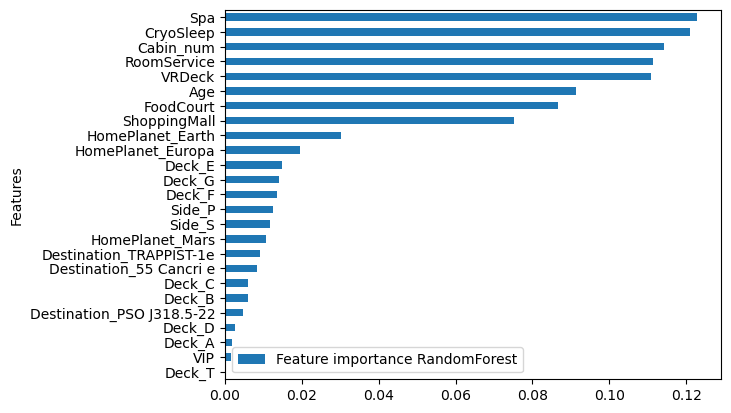

In [56]:
feature_dataframe.sort_values(by='Feature importance RandomForest').plot.barh(x='Features')

### I will remove the features less important, ´Deck_T´, ´Vip´, ´Deck_A´, ´Deck_D´, 'Deck_B', 'Deck_C' and 'Destination_PSO J318.5-22	'

In [67]:
columns = ['Age', 'CryoSleep', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 
        'VRDeck', 'Cabin_num', 'Destination_55 Cancri e',
       'Destination_TRAPPIST-1e',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Side_P',
       'Side_S','Deck_E', 'Deck_F',
       'Deck_G']
X = X[columns]

### And train again...

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [69]:
from sklearn.model_selection import cross_val_score

rforest = RandomForestClassifier(n_estimators=226, random_state=123, min_samples_split=4, min_samples_leaf=2,
                                 max_depth=15)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
print('Score', rforest.score(X_test, y_test))
cross = cross_val_score(rforest, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.8210671573137075
Score cross-validado 0.8036126495581956


In [70]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def objective(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    # Create an instance of the RandomForestClassifier model with the suggested hyperparameters
    model2 = RandomForestClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=123)
    
    # Train the model
    model2.fit(X_train, y_train)
    
    # Predict of data
    y_pred2 = model2.predict(X_test)
    
    # calculate the accuracy in dataset test
    accuracy2 = accuracy_score(y_test, y_pred2)
    
    return accuracy2

# Create an Optuna study object
study = optuna.create_study(direction='maximize')

# Run optimization
study.optimize(objective, n_trials=100)

# Imprimir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", study.best_params)

# Imprimir a acurácia do melhor modelo nos dados de teste
print("Acurácia do melhor modelo nos dados de teste:", study.best_value)

[I 2024-02-28 10:58:43,981] A new study created in memory with name: no-name-77703690-8f92-4467-8274-d127dd37be87
[I 2024-02-28 10:58:45,744] Trial 0 finished with value: 0.8178472861085556 and parameters: {'n_estimators': 121, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8178472861085556.
[I 2024-02-28 10:58:49,132] Trial 1 finished with value: 0.8196872125114996 and parameters: {'n_estimators': 256, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8196872125114996.
[I 2024-02-28 10:58:50,237] Trial 2 finished with value: 0.7736890524379025 and parameters: {'n_estimators': 126, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8196872125114996.
[I 2024-02-28 10:58:51,249] Trial 3 finished with value: 0.7746090156393745 and parameters: {'n_estimators': 132, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 1 with value

[I 2024-02-28 11:00:26,035] Trial 36 finished with value: 0.8261269549218031 and parameters: {'n_estimators': 125, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 36 with value: 0.8261269549218031.
[I 2024-02-28 11:00:28,036] Trial 37 finished with value: 0.8183072677092916 and parameters: {'n_estimators': 124, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 36 with value: 0.8261269549218031.
[I 2024-02-28 11:00:29,219] Trial 38 finished with value: 0.8160073597056118 and parameters: {'n_estimators': 72, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 36 with value: 0.8261269549218031.
[I 2024-02-28 11:00:31,325] Trial 39 finished with value: 0.8201471941122355 and parameters: {'n_estimators': 109, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 36 with value: 0.8261269549218031.
[I 2024-02-28 11:00:31,929] Trial 40 finished with value: 0.7589696412143514 and 

[I 2024-02-28 11:02:06,235] Trial 72 finished with value: 0.8210671573137075 and parameters: {'n_estimators': 118, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 36 with value: 0.8261269549218031.
[I 2024-02-28 11:02:11,037] Trial 73 finished with value: 0.8155473781048758 and parameters: {'n_estimators': 180, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 36 with value: 0.8261269549218031.
[I 2024-02-28 11:02:14,129] Trial 74 finished with value: 0.8187672493100276 and parameters: {'n_estimators': 168, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 36 with value: 0.8261269549218031.
[I 2024-02-28 11:02:18,137] Trial 75 finished with value: 0.8187672493100276 and parameters: {'n_estimators': 215, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 36 with value: 0.8261269549218031.
[I 2024-02-28 11:02:20,704] Trial 76 finished with value: 0.8206071757129715 and pa

Melhores hiperparâmetros: {'n_estimators': 125, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4}
Acurácia do melhor modelo nos dados de teste: 0.8261269549218031


In [71]:
from sklearn.model_selection import cross_val_score

rforest = RandomForestClassifier(n_estimators=125, random_state=123, min_samples_split=10, min_samples_leaf=4,
                                 max_depth=15)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
print('Score', rforest.score(X_test, y_test))
cross = cross_val_score(rforest, X_test, y_test, cv=10, scoring='accuracy')
print('Score cross-validado', cross.mean())

Score 0.8261269549218031
Score cross-validado 0.8035915105906227


### Our score decreased 0,1%, but the model is more stable

In [65]:
rf = ModeloAuxiliar(clf=RandomForestClassifier, params=rf_params)
rf_features = rf.feature_importances(X_train,y_train)
cols = X_train.columns.values
cols

array(['Age', 'CryoSleep', 'FoodCourt', 'RoomService', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cabin_num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Side_P', 'Side_S', 'Deck_B', 'Deck_C', 'Deck_E', 'Deck_F',
       'Deck_G'], dtype=object)

<Axes: ylabel='Features'>

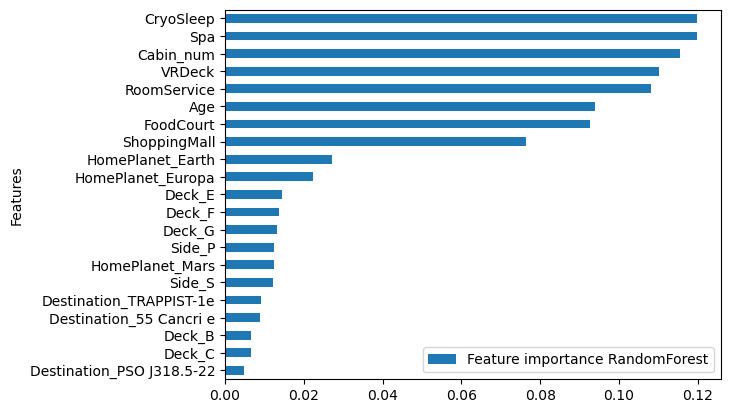

In [66]:
feature_dataframe = pd.DataFrame({'Features': cols, 
                                  'Feature importance RandomForest': rf_features})
feature_dataframe.sort_values(by='Feature importance RandomForest').plot.barh(x='Features')

### Finally, our score is

In [72]:
rforest.score(X_test, y_test)

0.8261269549218031

## Let´s generate our predict

In [73]:
test.shape

(4277, 26)

In [74]:
X_test.shape

(2174, 18)

#### We need to leave it the same

In [75]:
test[columns].shape

(4277, 18)

In [76]:
rforest_pred = rforest.predict(test[columns])

# Create submission for Kaggle

In [79]:
submission2 = pd.DataFrame({'PassengerId': test.index, 'Transported': rforest_pred})
submission2

,PassengerId,Transported
0,0013_01,1.0
1,0018_01,0.0
2,0019_01,1.0
3,0021_01,1.0
4,0023_01,1.0
...,...,...
4272,9266_02,1.0
4273,9269_01,0.0
4274,9271_01,1.0
4275,9273_01,1.0


In [80]:
submission2['Transported'] = submission2['Transported'].replace({1: True, 0: False})
submission2.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [81]:
submission2.to_csv('submission2.csv', index=False)